# EDA '¿Phishing o legítimo?'

Vamos a analizar el dataset para ver que nos ofrece. Este dataset extraído de Kaggle: https://www.kaggle.com/datasets/shashwatwork/web-page-phishing-detection-dataset nos ofrece 11430 url clasificadas en función de si son enlaces de fishing o enlaces legitimos basandose en 82 parámetros distintos. Haciendo un EDA en profundidad podremos entender un poco mejor los datos que tenemos para posteriormente aplicar un modelo de machine learning adecuado que sepa predecir si un enlace dado es phising o es legitimo.

Para empezar, importaremos las diferentes bibliotecas que nos permitiran analizar el dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Haremos que el IDE nos permita ver el dataset y demás funciones que apliquemos sin limite de columnas y filas.

In [2]:
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

Creamos un dataframe a partir del dataset para poder trabajar.

In [3]:
data = pd.read_csv('../data/raw/dataset_phishing.csv')
data.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


Veamos las estadísticas del dataframe:

In [4]:
data.describe(include='all')

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
count,11430,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000,11430
unique,11429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,http://e710z0ear.du.r.appspot.com/c:/users/use...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,legitimate
freq,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5715
mean,NaN,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,...,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739,NaN
std,NaN,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,...,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955,NaN
min,NaN,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN
25%,NaN,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000,NaN
50%,NaN,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000,NaN
75%,NaN,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,...,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11430 entries, 0 to 11429
Data columns (total 89 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url                         11430 non-null  object 
 1   length_url                  11430 non-null  int64  
 2   length_hostname             11430 non-null  int64  
 3   ip                          11430 non-null  int64  
 4   nb_dots                     11430 non-null  int64  
 5   nb_hyphens                  11430 non-null  int64  
 6   nb_at                       11430 non-null  int64  
 7   nb_qm                       11430 non-null  int64  
 8   nb_and                      11430 non-null  int64  
 9   nb_or                       11430 non-null  int64  
 10  nb_eq                       11430 non-null  int64  
 11  nb_underscore               11430 non-null  int64  
 12  nb_tilde                    11430 non-null  int64  
 13  nb_percent                  114

In [6]:
data.shape

(11430, 89)

Vemos que:
- De las 11430 url del dataframe, hay 11429 distintas y solo se repite una vez una de ellas.
- No parece haber NaN, puesto que todas las columnas parecen tener el mismo numero de filas en el count. No obstante, lo comprobaremos más adelante.
- La fila de status, tiene solo dos parametros que se repiten 5715 veces cada uno. Al haber 11430 observaciones, podemos deducir que hay el mismo número de ambos parámetros, por lo que vemos que esta perfectamente equilibrado el dataset, a priori.
- Cabe destacar que en la vida real, hay mucha más proporción de enlaces que son legitimos que enlaces que son fishing, por lo que, a pesar de que para nuestro modelo, el hecho de que esten equilibrados es bastante bueno, puede que este un poco desvirtualizado.
- La última columna, 'status', que nos indica si la url es phising o es legitima, va a ser nuestra columna objetivo, nuestra 'y'.

Los dos valores de la columna 'status' son:

In [7]:
data['status'].unique()

array(['legitimate', 'phishing'], dtype=object)

Comprobamos que efectivamente hay el mismo número de uno y de otro valor:

In [8]:
data['status'].value_counts()

legitimate    5715
phishing      5715
Name: status, dtype: int64

Vemos que caracteristicas tiene el dataframe:

In [9]:
data.columns

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 

Los atributos del dataframe son 89:
- 1: 'url': la URL que se está analizando
- 2: 'length_url': longitud de la URL
- 3: 'length_hostname': longitud del nombre de host en la URL
- 4: 'ip': indica si la URL contiene una dirección IP en lugar de un nombre de host
- 5: 'nb_dots': número de puntos en la URL
- 6: 'nb_hyphens': número de guiones en la URL
- 7: 'nb_at': número de símbolos "@" en la URL
- 8: 'nb_qm': número de signos de interrogación en la URL
- 9: 'nb_and': número de símbolos "&" en la URL
- 10: 'nb_or': número de símbolos "|" en la URL
- 11: 'nb_eq': número de símbolos "=" en la URL
- 12: 'nb_underscore': número de guiones bajos en la URL
- 13: 'nb_tilde': número de símbolos "~" en la URL
- 14: 'nb_percent': número de símbolos "%" en la URL
- 15: 'nb_slash': número de barras diagonales en la URL
- 16: 'nb_star': número de asteriscos en la URL
- 17: 'nb_colon': número de dos puntos en la URL
- 18: 'nb_comma': número de comas en la URL
- 19: 'nb_semicolumn': número de puntos y comas en la URL
- 20: 'nb_dollar': número de símbolos "$" en la URL
- 21: 'nb_space': número de espacios en blanco en la URL
- 22: 'nb_www': indica si la URL contiene "www" en el nombre de host
- 23: 'nb_com': indica si la URL contiene ".com" en el nombre de host
- 24: 'nb_dslash': número de barras diagonales dobles en la URL
- 25: 'http_in_path': indica si la cadena "http" está presente en la ruta de la URL
- 26: 'https_token': indica si la cadena "https" está presente en la URL
- 27: 'ratio_digits_url': proporción de dígitos en la URL
- 28: 'ratio_digits_host': proporción de dígitos en el nombre de host de la URL
- 29: 'punycode': indica si el nombre de host de la URL se ha codificado en punycode
- 30: 'port': número de puerto en la URL
- 31: 'tld_in_path': indica si la extensión de dominio (TLD) está presente en la ruta de la URL
- 32: 'tld_in_subdomain': indica si la extensión de dominio (TLD) está presente en el subdominio de la URL
- 33: 'abnormal_subdomain': indica si el nombre de subdominio de la URL contiene caracteres inusuales
- 34: 'nb_subdomains': número de subdominios en la URL
- 35: 'prefix_suffix': indica si la URL tiene un prefijo o un sufijo
- 36: 'random_domain': indica si el nombre de host de la URL parece aleatorio
- 37: 'shortening_service': indica si la URL utiliza un servicio de acortamiento de URL
- 38: 'path_extension': indica si la ruta de la URL contiene una extensión de archivo
- 39: 'nb_redirection': número de redirecciones en la URL
- 40: 'nb_external_redirection': número de redirecciones externas en la URL
- 41: 'length_words_raw': longitud de la URL sin caracteres especiales
- 42: 'char_repeat': indica si hay caracteres repetidos en la URL
- 43: 'shortest_words_raw': longitud de la palabra más corta en la URL sin caracteres especiales
- 44: 'shortest_word_host': longitud de la palabra más corta en el nombre de host de la URL sin caracteres especiales
- 45: 'shortest_word_path': longitud de la palabra más corta en la ruta de la URL sin caracteres especiales
- 46: 'longest_words_raw': longitud de la palabra más larga en la URL sin caracteres especiales
- 47: 'longest_word_host': longitud de la palabra más larga en el nombre de host de la URL sin caracteres especiales
- 48: 'longest_word_path': longitud de la palabra más larga en la ruta de la URL sin caracteres especiales
- 49: 'avg_words_raw': longitud promedio de las palabras en la URL sin caracteres especiales
- 50: 'avg_word_host': longitud promedio de las palabras en el nombre de host de la URL sin caracteres especiales
- 51: 'avg_word_path': longitud promedio de las palabras en la ruta de la URL sin caracteres especiales
- 52: 'phish_hints': indica si la URL contiene palabras clave asociadas con phishing
- 53: 'domain_in_brand': indica si el nombre de dominio está incluido en la marca
- 54: 'brand_in_subdomain': indica si la marca está incluida en el subdominio de la URL
- 55: 'brand_in_path': indica si la marca está incluida en la ruta de la URL
- 56: 'suspecious_tld': indica si la extensión de dominio (TLD) de la URL parece sospechosa
- 57: 'statistical_report': indica si la URL se ha informado previamente como sospechosa
- 58: 'nb_hyperlinks': número de hipervínculos en la página web
- 59: 'ratio_intHyperlinks': proporción de hipervínculos internos en la página web
- 60: 'ratio_extHyperlinks': proporción de hipervínculos externos en la página web
- 61: 'ratio_nullHyperlinks': proporción de hipervínculos nulos en la página web
- 62: 'nb_extCSS': número de archivos CSS externos en la página web
- 63: 'ratio_intRedirection': proporción de redirecciones internas en la página web
- 64: 'ratio_extRedirection': proporción de redirecciones externas en la página web
- 65: 'ratio_intErrors': proporción de errores internos en la página web
- 66: 'ratio_extErrors': proporción de errores externos en la página web
- 67: 'login_form': indica si la página web contiene un formulario de inicio de sesión
- 68: 'external_favicon': indica si la página web utiliza un favicon externo
- 69: 'links_in_tags': indica si hay enlaces en las etiquetas HTML de la página web
- 70: 'submit_email': indica si el formulario de la página web solicita una dirección de correo electrónico
- 71: 'ratio_intMedia': proporción de archivos multimedia internos en la página web
- 72: 'ratio_extMedia': proporción de archivos multimedia externos en la página web
- 73: 'sfh': indica si la página web utiliza un formulario de envío de datos ocultos (Submit Hidden Form)
- 74: 'iframe': indica si la página web utiliza iframes
- 75: 'popup_window': indica si la página web contiene ventanas emergentes
- 76: 'safe_anchor': indica si los enlaces de la página web utilizan atributos "rel" para evitar la apertura de nuevas pestañas
- 77: 'onmouseover': indica si la página web utiliza la función "onmouseover"
- 78: 'right_clic': indica si la página web deshabilita el clic derecho
- 79: 'empty_title': indica si la página web utiliza títulos vacíos
- 80: 'domain_in_title': indica si el nombre de dominio está incluido en el título de la página web
- 81: 'domain_with_copyright': indica si el nombre de dominio está registrado con derechos de autor
- 82: 'whois_registered_domain': indica si el nombre de dominio está registrado en el WHOIS
- 83: 'domain_registration_length': longitud del registro del dominio
- 84: 'domain_age': antigüedad del dominio
- 85: 'web_traffic': tráfico de la página web
- 86: 'dns_record': indica si la página web tiene un registro DNS válido
- 87: 'google_index': indica si la página web aparece en el índice de Google
- 88: 'page_rank': rango de la página web
- 89: 'status': indica si la página web es legítima o un sitio de phishing

Veamos si hay algún NaN en alguna de las columnas:

In [10]:
data.isna().sum()

url                0
length_url         0
length_hostname    0
ip                 0
nb_dots            0
                  ..
web_traffic        0
dns_record         0
google_index       0
page_rank          0
status             0
Length: 89, dtype: int64

Ahora vamos a ver el valor que se repite en la columna 'url' en que filas esta el duplicado:

In [11]:
data[data.duplicated(['url'], keep=False)]

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
6035,http://e710z0ear.du.r.appspot.com/c:/users/use...,62,26,0,4,0,0,0,0,0,...,1,1,0,217,5627,0,0,1,5,phishing
11305,http://e710z0ear.du.r.appspot.com/c:/users/use...,54,26,0,4,0,0,0,0,0,...,1,1,0,230,5614,0,0,1,5,phishing


Vemos que a pesar de ser la misma url, algunos atributos como la longitud de esta son distintos, por lo que tal vez en la columna url estén acortados. Como no podemos saber con certeza si son enlaces iguales o no, los dejaremos como están.

Veamos si efectivamente hay el mismo número de url de phishing que de url legitimas:

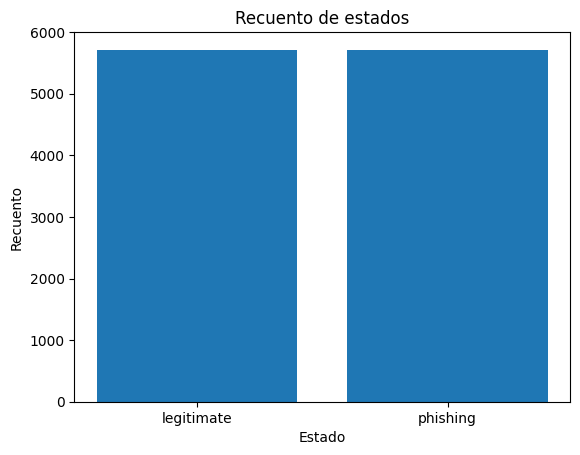

In [12]:
status_counts = data["status"].value_counts()
plt.bar(status_counts.index, status_counts.values)
plt.xlabel("Estado")
plt.ylabel("Recuento")
plt.title("Recuento de estados")
plt.show()

Podemos crear boxplots de cada columna con respecto a la columna 'status' para visualizar la distribución de cada característica y verificar si existen valores atípicos o distribuciones no normales.

In [13]:
'''
numeric_cols = data.select_dtypes(include=["float64", "int64"])
status_col = data["status"]

for col in numeric_cols:
    sns.boxplot(x=status_col, y=numeric_cols[col])
    plt.title(f"{col} vs status")
    plt.show()
''';

Podemos crear gráficos de dispersión para visualizar la relación entre las características.

In [14]:
'''
import itertools
numeric_cols = data.select_dtypes(include=["float64", "int64"])

for pair in itertools.combinations(numeric_cols.columns, 2):
    plt.scatter(data[pair[0]], data[pair[1]])
    plt.xlabel(pair[0])
    plt.ylabel(pair[1])
    plt.title(f"{pair[0]} vs {pair[1]}")
    plt.show()
''';

*Dejo comentados estos códigos por que salen demasiadas gráficas*

Hagamos un heatmap con la matriz de correlación de todas las columnas:

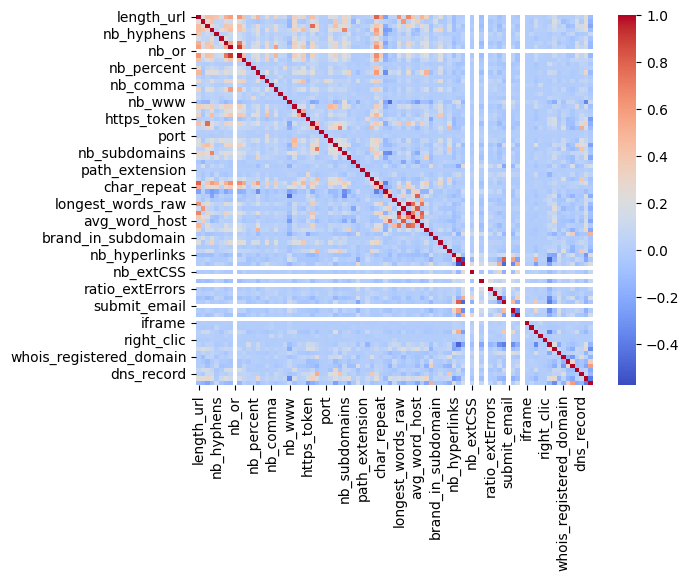

In [15]:
numeric_cols = data.select_dtypes(include=["float64", "int64"])

corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, cmap="coolwarm")

plt.show()

Vemos que a pesar de que en la zona central encontramos columnas con correlaciones bastante altas, apenas podemos distinguir que columnas son.

Vamos a intentar hacer una lista con listas que contengan todos los valores de cada columna, y hacer un bucle for anidado que nos cree una matriz de correlación entre -1 y 1 y luego, hacer un heatmap.

In [16]:
lista_de_columnas = data.values.tolist()
lista_de_columnas = list(zip(*lista_de_columnas))
lista_de_columnas

[('http://www.crestonwood.com/router.php',
  'http://shadetreetechnology.com/V4/validation/a111aedc8ae390eabcfa130e041a10a4',
  'https://support-appleld.com.secureupdate.duilawyeryork.com/ap/89e6a3b4b063b8d/?cmd=_update&dispatch=89e6a3b4b063b8d1b&locale=_',
  'http://rgipt.ac.in',
  'http://www.iracing.com/tracks/gateway-motorsports-park/',
  'http://appleid.apple.com-app.es/',
  'http://www.mutuo.it',
  'http://www.shadetreetechnology.com/V4/validation/ba4b8bddd7958ecb8772c836c2969531',
  'http://vamoaestudiarmedicina.blogspot.com/',
  'https://parade.com/425836/joshwigler/the-amazing-race-host-phil-keoghan-previews-the-season-27-premiere/',
  'https://www.astrologyonline.eu/Astro_MemoNew/Profilo.asp',
  'https://www.lifewire.com/tcp-port-21-818146',
  'https://technofizi.net/top-best-mp3-downloader-app-for-android-free-music-download/',
  'http://html.house/l7ceeid6.html',
  'https://www.missfiga.com/',
  'http://wave.progressfilm.co.uk/time3/?logon=myposte',
  'https://www.chiefarch

In [17]:
import warnings
warnings.filterwarnings("ignore")
lista_de_columnas = lista_de_columnas[1:-1]
matriz_correlaciones = np.zeros((len(lista_de_columnas), len(lista_de_columnas)))
for i in range(len(lista_de_columnas)):
    for j in range(i+1, len(lista_de_columnas)):
        corr = np.corrcoef(lista_de_columnas[i], lista_de_columnas[j])[-1, 1]
        if corr > 0.6 or corr < -0.6:
            matriz_correlaciones[i][j] = corr
            matriz_correlaciones[j][i] = corr

matriz_correlaciones

array([[0., 1., 1., ..., 1., 1., 1.],
       [1., 0., 1., ..., 1., 1., 1.],
       [1., 1., 0., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 0., 1., 1.],
       [1., 1., 1., ..., 1., 0., 1.],
       [1., 1., 1., ..., 1., 1., 0.]])

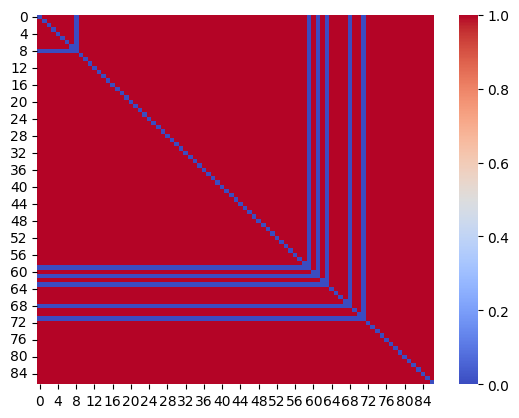

In [18]:
sns.heatmap(matriz_correlaciones, cmap='coolwarm', annot=False)
plt.show()

Sigue siendo muy dificil diferenciar nada, por lo que vamos a crear una lista con las correlaciones más altas, tanto por encima de 0.6 como por debajo de -0.6 y que nos indique entre que columnas existen esas correlaciones.

In [19]:
posiciones_de_listas_con_correlaciones = []
for i in range(len(matriz_correlaciones)):
    for j in range(i+1, len(matriz_correlaciones)):
        if matriz_correlaciones[i][j] > 0.6 or matriz_correlaciones[i][j] < -0.6:
            posiciones_de_listas_con_correlaciones.append((i, j, matriz_correlaciones[i][j]))

posiciones_de_listas_con_correlaciones

[(0, 1, 1.0),
 (0, 2, 0.9999999999999999),
 (0, 3, 1.0),
 (0, 4, 0.9999999999999998),
 (0, 5, 0.9999999999999998),
 (0, 6, 0.9999999999999999),
 (0, 7, 0.9999999999999999),
 (0, 9, 1.0),
 (0, 10, 1.0),
 (0, 11, 1.0),
 (0, 12, 1.0),
 (0, 13, 1.0),
 (0, 14, 1.0),
 (0, 15, 1.0),
 (0, 16, 1.0),
 (0, 17, 1.0),
 (0, 18, 1.0),
 (0, 19, 1.0),
 (0, 20, 1.0),
 (0, 21, 1.0),
 (0, 22, 1.0),
 (0, 23, 1.0),
 (0, 24, 1.0),
 (0, 25, 1.0),
 (0, 26, 1.0),
 (0, 27, 1.0),
 (0, 28, 1.0),
 (0, 29, 1.0),
 (0, 30, 1.0),
 (0, 31, 1.0),
 (0, 32, 1.0),
 (0, 33, 1.0),
 (0, 34, 1.0),
 (0, 35, 0.9999999999999998),
 (0, 36, 1.0),
 (0, 37, 0.9999999999999999),
 (0, 38, 1.0),
 (0, 39, 1.0),
 (0, 40, 1.0),
 (0, 41, 1.0),
 (0, 42, 0.9999999999999999),
 (0, 43, 1.0),
 (0, 44, 0.9999999999999999),
 (0, 45, 1.0),
 (0, 46, 1.0),
 (0, 47, 1.0),
 (0, 48, 1.0),
 (0, 49, 0.9999999999999999),
 (0, 50, 1.0),
 (0, 51, 1.0),
 (0, 52, 1.0),
 (0, 53, 1.0),
 (0, 54, 0.9999999999999998),
 (0, 55, 0.9999999999999998),
 (0, 56, 1.0),
 (0

Vemos que al haber tantas filas y columnas, es muy dificil graficar los datos. Por lo que vamos a hacer alguna criba para poder trabajar:

- Tenemos 87 columnas numericas, las unicas categoricas son la de las url y la del status.
- Tenemos 11430 filas. La mitad de 11430 es 5715. Podriamos decir que si una columna numerica tiene solo 2 valores únicos, es decir, 5715 filas de esa columna son de un tipo y las otras 5715 filas son de otro, podríamos considerar esa columna como categórica, puesto que sus valores podrían clasificarse en un tipo o en otro.

- Si hacemos los cálculos, si en una columna de 11430 valores solo hay 2 únicos, (2/11430)x100 = 0.0175, por lo que podemos usar este umbral para decir que si la columna tiene valores únicos en este umbral o por debajo, la podemos considerar como categórica.

- Resaltar que esto es un forma elegida por mi mismo para poder simplificar las gráficas en base a la idea de tomar una columna numérica con solo dos valores únicos como si fuese categórica binaria. Podemos ver que este umbral sería inversamente proporcional al número de columnas numéricas que tratariamos como categóricas pues, cuanto más aumentásemos este umbral, menos columnas se tratarían como categóricas y viceversa.

Veamos cuantas columnas numericas podemos considerarlas como categóricas:

- Para ello, crearemos un diccionario vacío donde meteremos booleanos. True las columnas que esten en ese umbral o por debajo de este, es decir, las que trataremos como categóricas, y False para las que superen ese umbral.

- Luego, con un bucle for haremos que las columnas que sigamos considerando como numericas, es decir, las que coincidan con un False, las meteremos en una lista de numericas y el resto, las que consideremos como si fuesen categóricas, en otra lista de categóricas.

In [20]:
como_categoricas = {}
for var in data.iloc[:,1:].columns:
    como_categoricas[var] = 1.*data[var].nunique()/data[var].count() <= 0.0175

col_numericas = []
col_categoricas = []
for col in como_categoricas.keys():
    if (como_categoricas[col] == False):
        col_numericas.append(col)
    else:
        col_categoricas.append(col)

Vamos a hacer un heatmap donde veamos las columnas numéricas y su correlación. Lo vamos a comparar con el heatmap de todas las correlaciones.

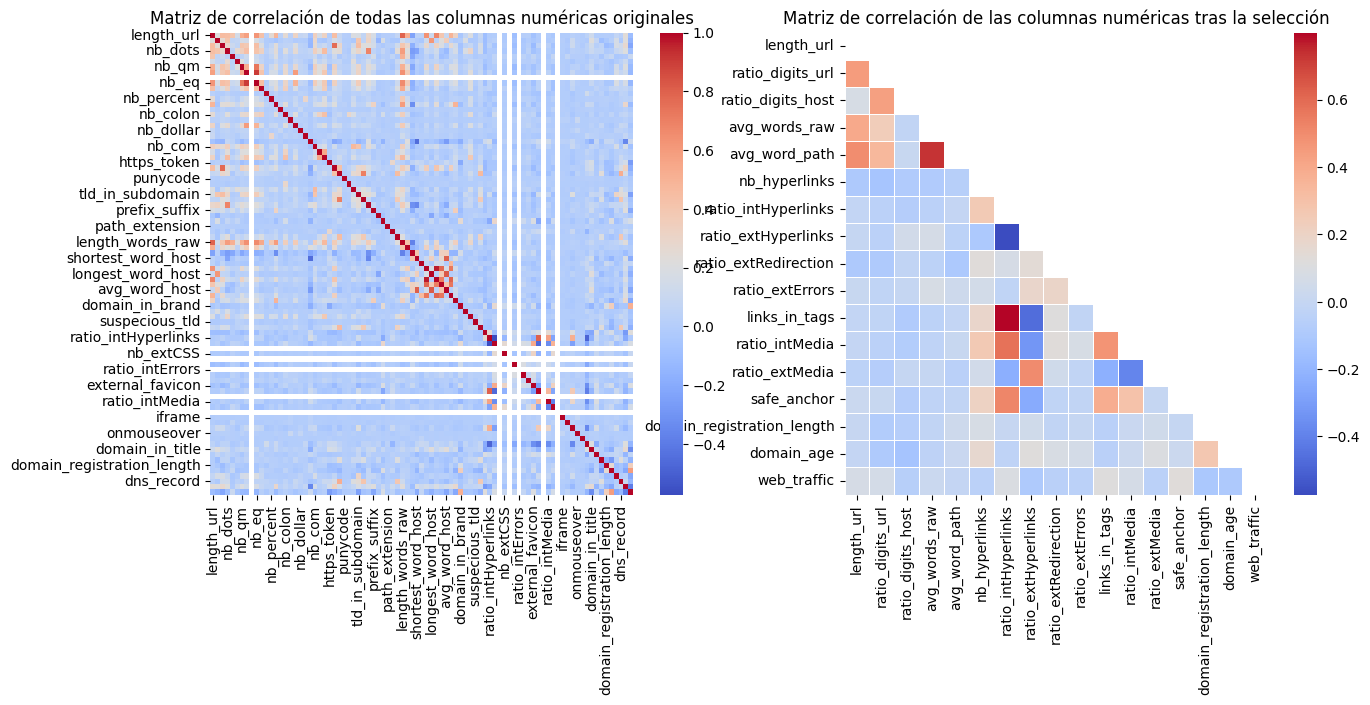

<Figure size 960x960 with 0 Axes>

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15, 6))

numeric_cols = data.select_dtypes(include=["float64", "int64"])
corr_matrix = numeric_cols.corr()
sns.heatmap(corr_matrix, cmap="coolwarm", ax=ax1)
ax1.set_title('Matriz de correlación de todas las columnas numéricas originales')


corr = data[col_numericas].corr()
fig = plt.figure(figsize=(12,12),dpi=80)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, cmap='coolwarm', linewidths=.5, annot=False, ax=ax2)
ax2.set_title('Matriz de correlación de las columnas numéricas tras la selección')

plt.show()

Ahora el heatmap es mucho más pequeño y visible y vemos algunas correlaciones grandes entre algunas columnas. Pero sigamos investigando a ver que más información podemos sacar.

Vamos a agrupar las columnas numericas ya filtradas por la columna 'status', que será nuestra columna objetivo, con las medias de cada una de estas columnas númericas, para ver la relación que existe entre ellas para ser urls legitimas o suplantaciones de identidad.

In [22]:
df_agrupado = data.groupby('status')[col_numericas].mean().reset_index().T
df_agrupado.rename(columns={0:'Legítimo', 1:'Suplantación'}, inplace=True)
df_agrupado

,Legítimo,Suplantación
status,legitimate,phishing
length_url,47.381452,74.871916
ratio_digits_url,0.02129,0.084984
ratio_digits_host,0.004067,0.045981
avg_words_raw,6.564222,7.953541
avg_word_path,3.682687,6.502162
nb_hyperlinks,144.32336,30.056168
ratio_intHyperlinks,0.694306,0.510608
ratio_extHyperlinks,0.250051,0.30339
ratio_extRedirection,0.19911,0.118742


Hacemos una gráfica de barras agrupadas:

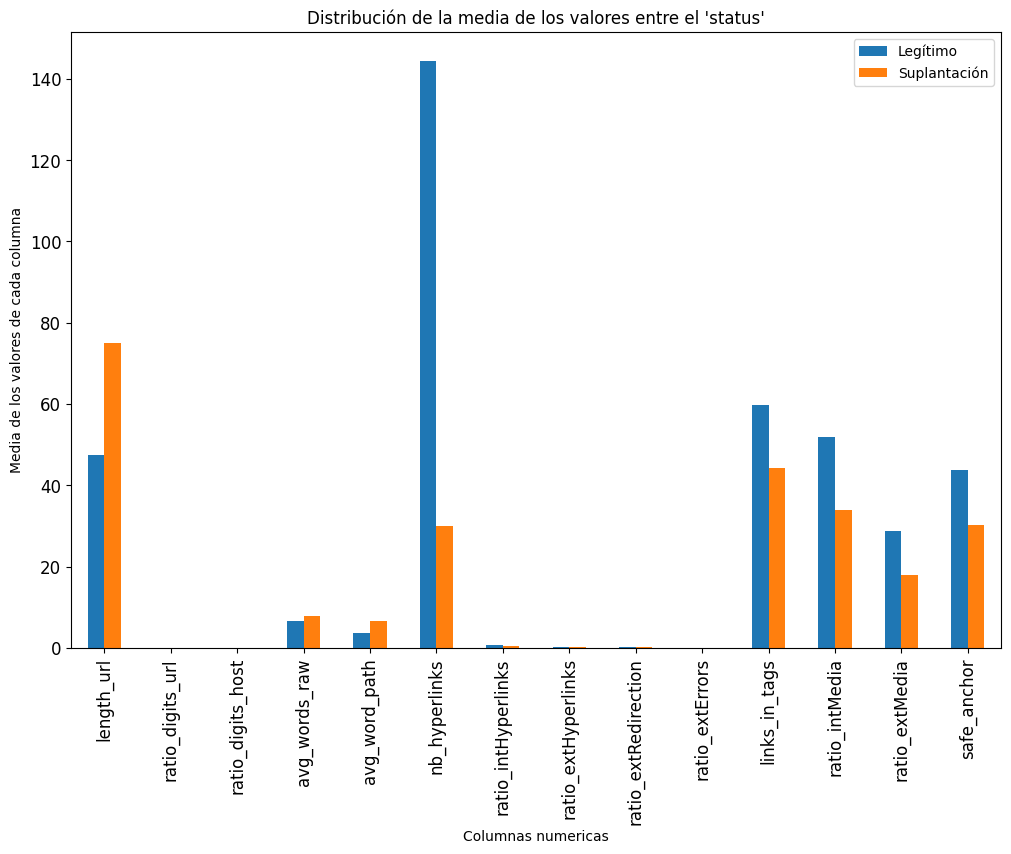

In [23]:
ax = df_agrupado[1:-3][['Legítimo','Suplantación']].plot(kind='bar', title ="Distribución de la media de los valores entre su 'status'", figsize=(12, 8), legend=True, fontsize=12)

ax.set_title("Distribución de la media de los valores entre el 'status'")
ax.set_xlabel('Columnas numericas')
ax.set_ylabel('Media de los valores de cada columna')
ax.legend()
plt.show()

Aquí podemos ver algunas cosas como por ejemplo:

- Cuanto mayor sea la longitud de la url, más probable es que el enlace sea falso.
- Cuanto mayor sea la longitud promedio de las palabras de la URL sin caracteres especiales, más probable de que el enlace sea falso.
- Cuanto mayor sea la longitud promedio de las palabras en la ruta de la URL sin caracteres especiales, más probable de que el enlace sea falso.
- Cuanto mayor sea el número de hipervinculos de la página web, aumentan exponencialmente las posibilidades de que sea un enlace legítimo.
- Cuanto mayor sea el número de enlaces en las etiquetas HTML de la página web, más probable que sea legítimo.
- Cuanto mayor sea la proporción de archivos multimedia internos en la página web, más probable que sea legítimo.
- Cuanto mayor sea la proporción de archivos multimedia externos en la página web, más probable que sea legítimo.
- Si los enlaces de la página web utilizan atributos "rel" para evitar la apertura de nuevas pestañas, más probable que sea legítimo.

Ahora que tenemos un conocimiento más profundo de los datos, podemos empezar a trabajar sobre ellos y ver que modelo puede ser más efectivo.